In [11]:
import pandas as pd
df=pd.read_csv(r"C:\Users\91628\Desktop\Capstone_Project\model preparation\Feature_engineering.csv")

In [12]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder



In [5]:
# Step : Define Features and Target
# ----------------------------------
# Define the features (X) and target (y)
features = [col for col in df.columns if col not in ['date', 'symbol', 'RSI']]
X = df[features]
y = df['RSI']



In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [7]:
# Step 3: Train the Model
# -----------------------
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=12)



In [8]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=12)

In [9]:
# Predict on the test set
y_pred = rf_model.predict(X_test)


In [10]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 178.72910899721393
R^2 Score: 0.6805384198556512


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455154 entries, 0 to 455153
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   date                455154 non-null  object 
 1   open                455154 non-null  float64
 2   high                455154 non-null  float64
 3   low                 455154 non-null  float64
 4   close               455154 non-null  float64
 5   volume              455154 non-null  int64  
 6   dividends           455154 non-null  float64
 7   stock splits        455154 non-null  float64
 8   symbol              455154 non-null  object 
 9   capital gains       455154 non-null  float64
 10  previous day close  455154 non-null  float64
 11  rolling_dividends   455154 non-null  float64
 12  rolling_splits      455154 non-null  float64
 13  adj close           455154 non-null  float64
 14  prev_close          455154 non-null  float64
 15  maxdiff             455154 non-nul

RSI                   1.000000
up                    0.500872
MACD                  0.107699
rolling_dividends     0.103311
prev_diff             0.097843
capital gains         0.097398
daydiff               0.081190
SignalLine            0.069774
adj close             0.046069
low                   0.045929
close                 0.045924
high                  0.044723
open                  0.044690
prev_close            0.044207
previous day close    0.044072
EMA12                 0.036639
EMA26                 0.034296
dividends             0.013216
change_tomorrow       0.005363
stock splits          0.000816
rolling_splits       -0.003846
maxdiff              -0.006504
volume               -0.013243
dn                   -0.480250
Name: RSI, dtype: float64


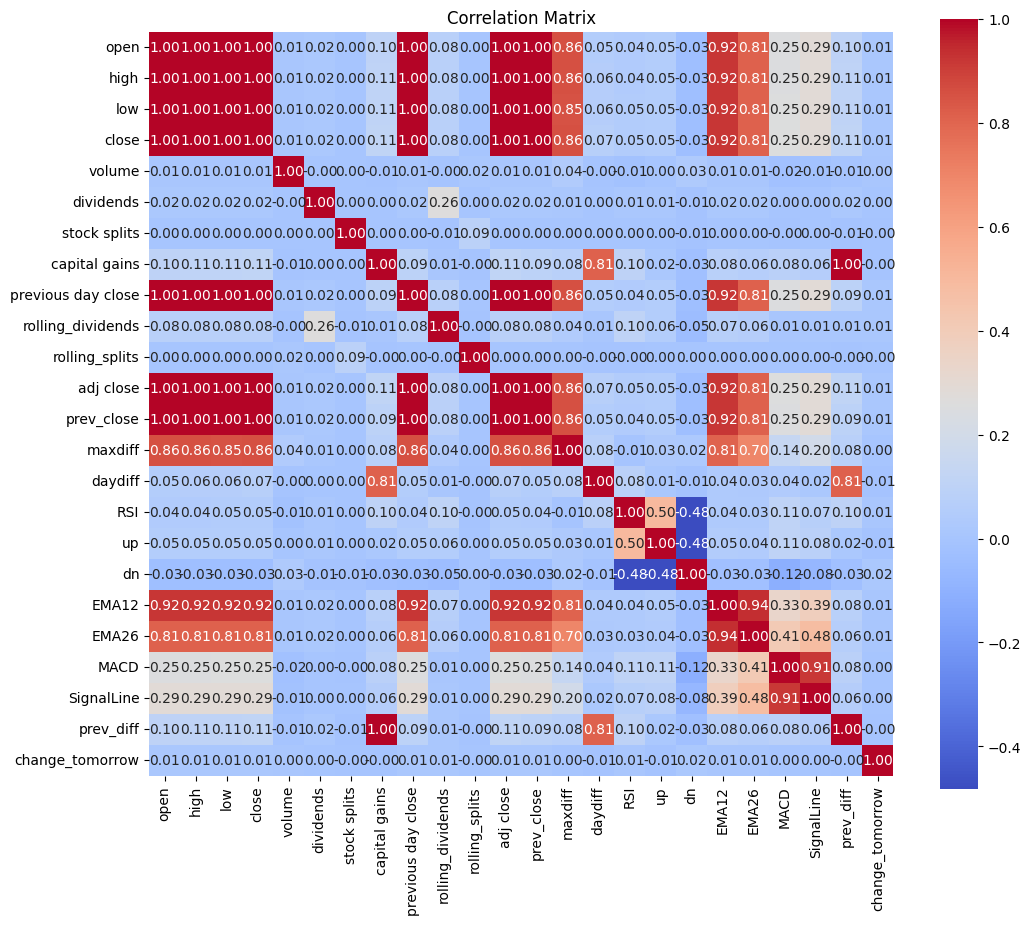

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Drop non-numeric columns
df_numeric = df.drop(columns=['date', 'symbol'])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Select the correlation of all features with the target variable (RSI)
correlation_with_rsi = correlation_matrix['RSI'].sort_values(ascending=False)
print(correlation_with_rsi)

# Optional: Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


In [24]:


selected_features = [
    'up', 
    'MACD', 
    'rolling_dividends', 
    'prev_diff', 
    'capital gains', 
    'daydiff', 
    'SignalLine', 
    'adj close', 
    'low', 
    'close', 
    'high', 
    'open', 
    'prev_close', 
    'previous day close', 
    'EMA12', 
    'EMA26', 
    
]
# Prepare the data for modeling
X = df[selected_features]
y = df['RSI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [25]:
# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)



In [26]:
# Train the model
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [27]:
# Make predictions
y_pred = model.predict(X_test)



In [28]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 205.13403794309127


In [23]:
# Feature importance
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print("\nFeature Importance:\n", importance_df)



Feature Importance:
               Feature  Importance
0                  up    0.348849
2           prev_diff    0.143176
4             daydiff    0.119586
6                 low    0.064749
3       capital gains    0.064188
8                high    0.060141
10         prev_close    0.045837
9                open    0.042977
5           adj close    0.037830
1   rolling_dividends    0.037128
7               close    0.035539


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Assuming `df` is your DataFrame and `RSI` is your target variable
# Step 1: Filter the DataFrame to include only important features
selected_features = [
    'up', 'prev_diff', 'daydiff', 'low', 'capital gains', 
    'high', 'prev_close', 'open', 'adj close'
]

# Define target and feature data
X = df[selected_features].copy()
y = df['RSI']

# Step 2: Create lagged features for important features
lags = [1, 2, 3]  # Define the number of lag periods
for feature in ['up', 'prev_diff', 'daydiff']:
    for lag in lags:
        X[f'{feature}_lag{lag}'] = X[feature].shift(lag)

# Drop rows with NaN values introduced by lagging
X.dropna(inplace=True)
y = y[X.index]

# Step 3: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Step 4: Scale the features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
# Step 5: Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)



In [ ]:
# Best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)



In [ ]:
# Step 6: Train the final model with best parameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Step 7: Evaluate the model using cross-validation
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation MSE:", -np.mean(cv_scores))

# Step 8: Test Set Evaluation
y_pred = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)

# Step 9: Feature Importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", feature_importances)
